In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

  # Load the insurance data

In [35]:

# Load the insurance data
file_path ='../data/MachineLearningRating_v3.txt'
data = pd.read_csv(file_path, sep='|', low_memory=False)

In [36]:
def data_understanding(data):
    # Data Understanding
    print(data.head())
    print(data.info())

In [37]:
data_understanding(data)

   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

In [38]:
def Catagoriy_data(data):
  obj = (data.dtypes == 'object')
  object_cols = list(obj[obj].index)
  print("Categorical variables:",len(object_cols))

  int_ = (data.dtypes == 'int')
  num_cols = list(int_[int_].index)
  print("Integer variables:",len(num_cols))

  fl = (data.dtypes == 'float')
  fl_cols = list(fl[fl].index)
  print("Float variables:",len(fl_cols))

In [39]:
Catagoriy_data(data)

Categorical variables: 36
Integer variables: 0
Float variables: 11


# Step 1: Data Summarization


In [40]:

def data_summarization(data):
    # Print all column names in the DataFrame
    print("Column names:")
    print(data.columns.tolist())

    # Calculate descriptive statistics for numerical features
    numerical_features = ['TotalPremium', 'TotalClaims', 'PolicyID']
    for feature in numerical_features:
        if feature in data.columns:
            print(f"Descriptive statistics for '{feature}':")
            print(data[feature].describe())
            print()
        else:
            print(f"Column '{feature}' not found in the DataFrame.")

    # Review data types
    print("\nColumn data types:")
    print(data.dtypes)

# Usage



In [41]:
data_summarization(data)

Column names:
['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']
Descriptive statistics for 'TotalPremium':
count    1.000098e+06
mean     6.190550e+01
std      2.302845e+02
min     -7.825768e+02
25%      0.000000e+00
50%      2.178333e+00
75%      

# Data Quality Assessment

In [42]:

def data_quality_assessment(data):
    # Check for missing values
    print(data.isnull().sum())
    # Drop rows with any missing values
 

In [43]:
data_quality_assessment(data)

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

# Univariate Analysis

In [44]:

def univariate_analysis(data):
    # Plot histograms for numerical columns
    plt.figure(figsize=(10, 6))
    sns.histplot(data['TotalPremium'], bins=20, kde=True)
    plt.title('Distribution of Total Premium')
    plt.show()

    # Create bar charts for categorical columns
    plt.figure(figsize=(10, 6))
    sns.countplot(data['CoverType'])
    plt.title('Frequency of Cover Type')
    plt.show()

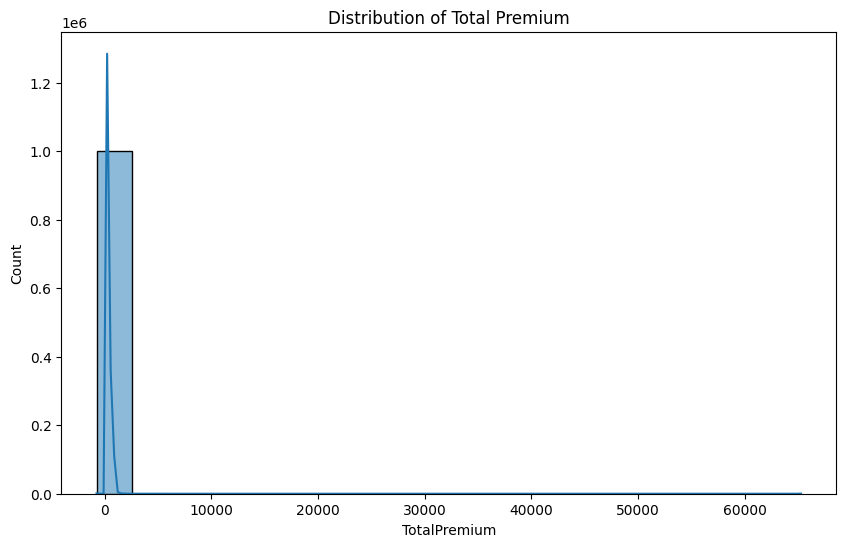

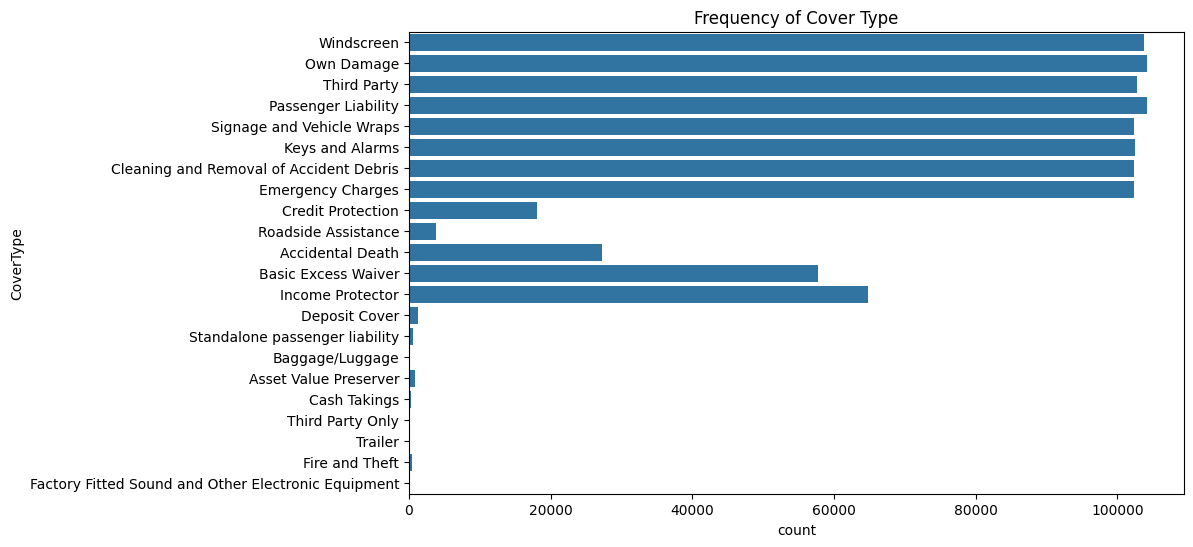

In [45]:

univariate_analysis(data)

 Bivariate or Multivariate Analysis

In [70]:

def bivariate_multivariate_analysis(data):
    # Explore correlations and associations between variables
    corr_matrix = data[['TotalPremium', 'TotalClaims', 'PostalCode']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    # Scatter plot for TotalPremium vs TotalClaims based on mmcode
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='PostalCode', data=data)
    plt.title('TotalPremium vs TotalClaims by PostalCode')
    plt.show()


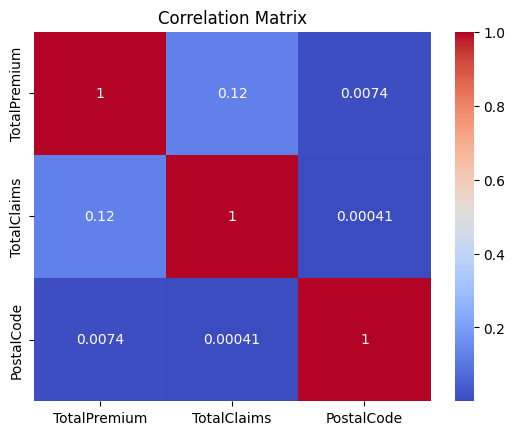

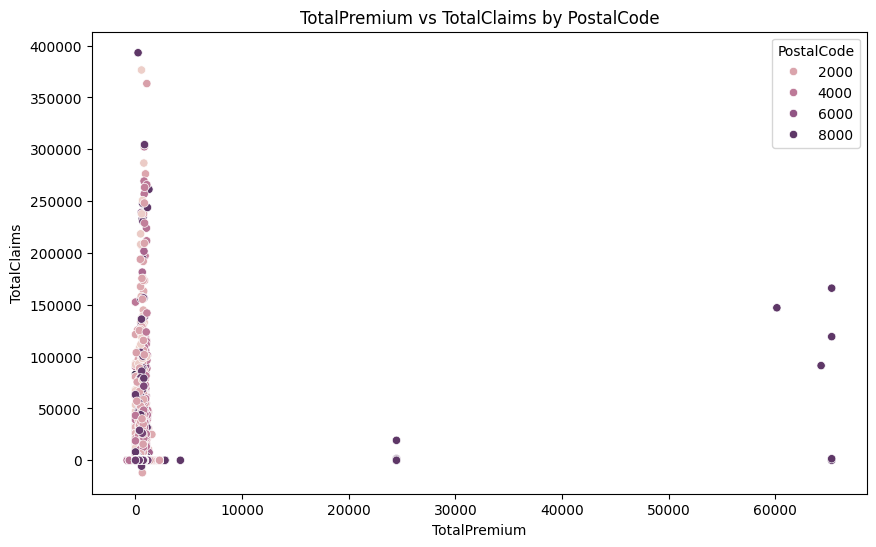

In [71]:
bivariate_multivariate_analysis(data)

In [48]:
correlation_coefficient = data['TotalPremium'].corr(data['TotalClaims'])
print(f"Pearson correlation coefficient: {correlation_coefficient:.2f}")


Pearson correlation coefficient: 0.12


 Data Comparison

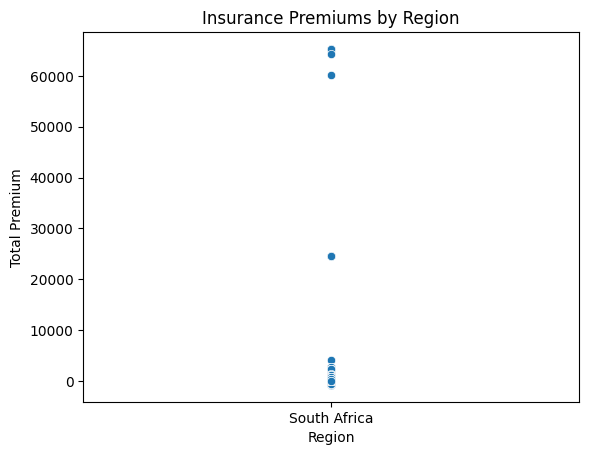

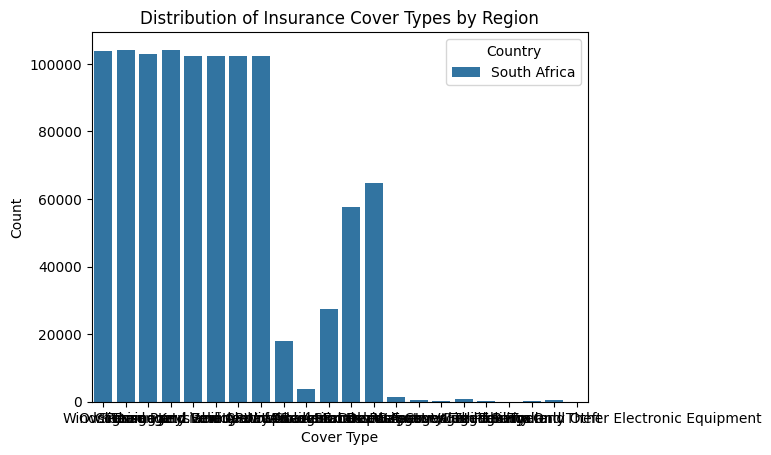

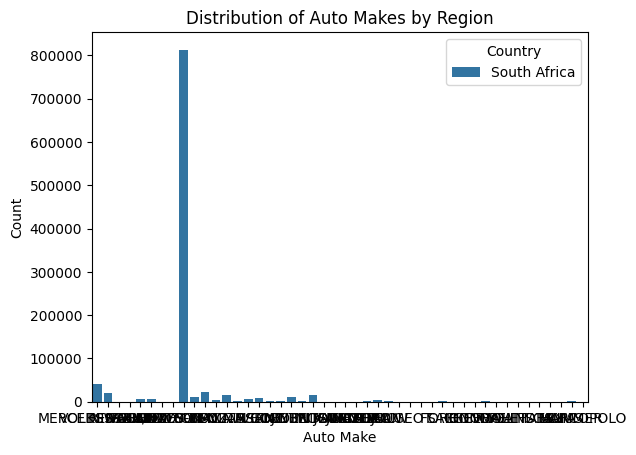

In [65]:


def plot_premium_vs_region(data):
    """
    Create a scatter plot to compare insurance premiums by region.
    Args:
        data (pd.DataFrame): Input data containing 'TotalPremium' and 'Country'.
    """
    sns.scatterplot(data=data, x='Country', y='TotalPremium')
    plt.xlabel('Region')
    plt.ylabel('Total Premium')
    plt.title('Insurance Premiums by Region')
    plt.show()

def plot_cover_type_distribution(data):
    """
    Create a bar chart to show the distribution of insurance cover types by region.
    Args:
        data (pd.DataFrame): Input data containing 'CoverType' and 'Country'.
    """
    sns.countplot(data=data, x='CoverType', hue='Country')
    plt.xlabel('Cover Type')
    plt.ylabel('Count')
    plt.title('Distribution of Insurance Cover Types by Region')
    plt.show()

def plot_auto_make_distribution(data):
    """
    Create a bar chart to show the distribution of auto makes by region.
    Args:
        data (pd.DataFrame): Input data containing 'make' and 'Country'.
    """
    sns.countplot(data=data, x='make', hue='Country')
    plt.xlabel('Auto Make')
    plt.ylabel('Count')
    plt.title('Distribution of Auto Makes by Region')
    plt.show()

# Usage
plot_premium_vs_region(data)
plot_cover_type_distribution(data)
plot_auto_make_distribution(data)



 Outlier Detection

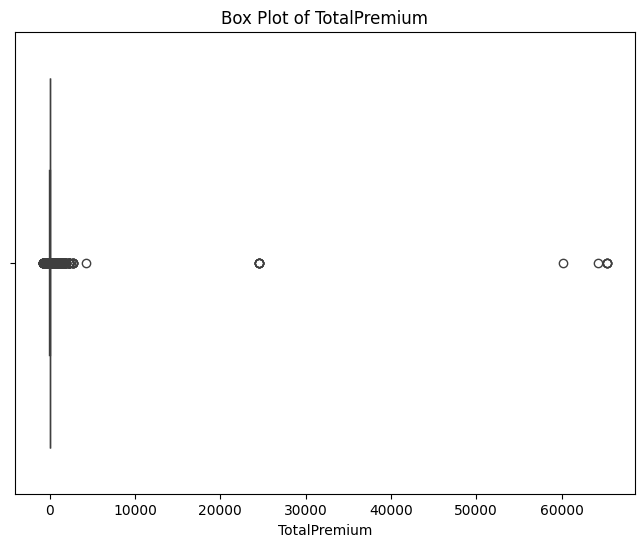

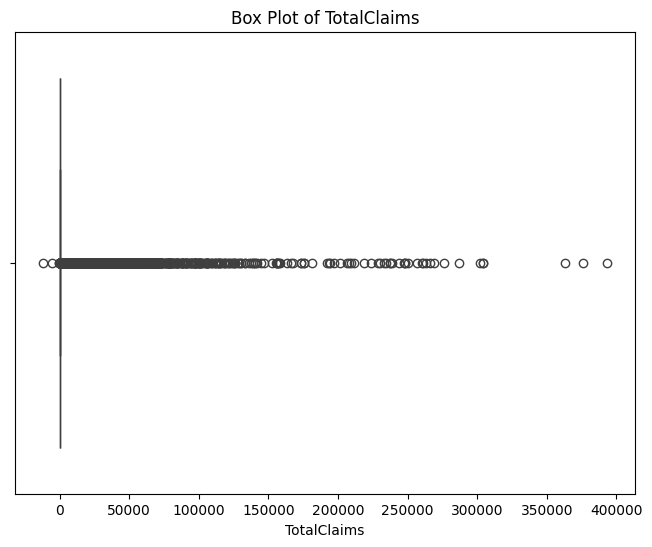

In [67]:

def plot_boxplot(data, column_name):
    """
    Create a box plot for a numerical column.
    Args:
        data (pd.DataFrame): Input data.
        column_name (str): Name of the column.
    """
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column_name])
    plt.title(f'Box Plot of {column_name}')
    plt.xlabel(column_name)
    plt.show()

# Usage
plot_boxplot(data, 'TotalPremium')
plot_boxplot(data, 'TotalClaims')


visualization

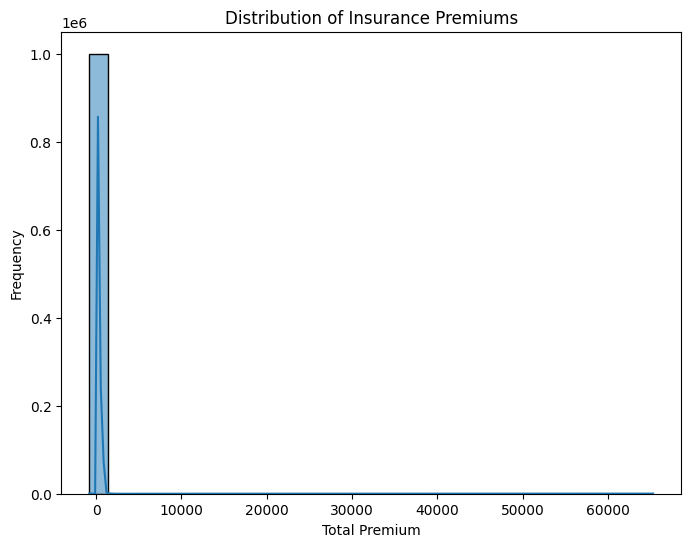

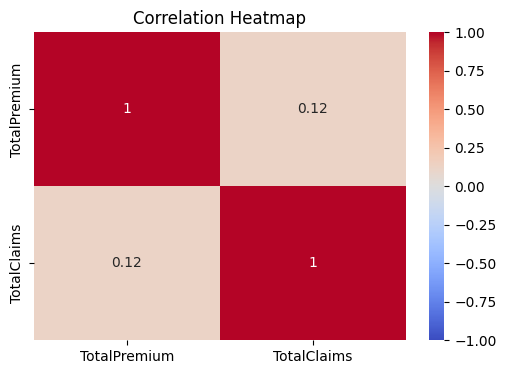

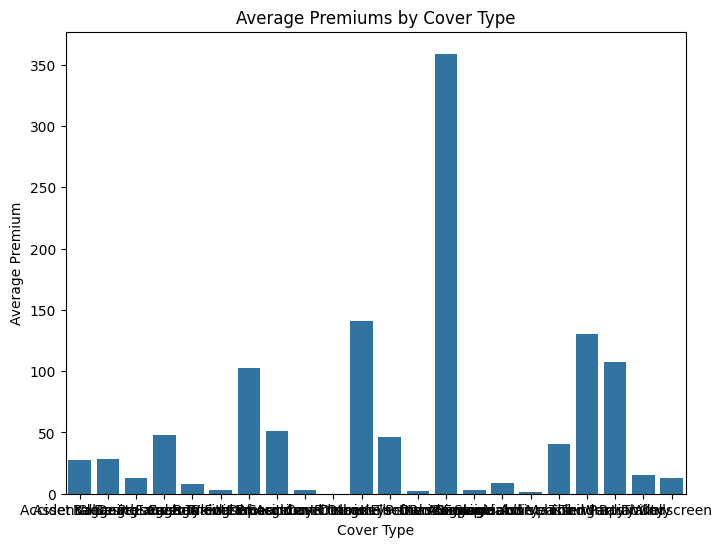

In [72]:


def plot_premium_distribution(data):
    """
    Create a histogram to visualize the distribution of insurance premiums.
    Args:
        data (pd.DataFrame): Input data.
    """
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x='TotalPremium', bins=30, kde=True)
    plt.xlabel('Total Premium')
    plt.ylabel('Frequency')
    plt.title('Distribution of Insurance Premiums')
    plt.show()

def plot_correlation_heatmap(data):
    """
    Create a heatmap to visualize the correlation between TotalPremium and TotalClaims.
    Args:
        data (pd.DataFrame): Input data.
    """
    correlation_matrix = data[['TotalPremium', 'TotalClaims']].corr()
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()

def plot_avg_premium_by_cover(data):
    """
    Create a bar chart to compare average premiums by insurance cover type.
    Args:
        data (pd.DataFrame): Input data.
    """
    avg_premium_by_cover = data.groupby('CoverType')['TotalPremium'].mean()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=avg_premium_by_cover.index, y=avg_premium_by_cover.values)
    plt.xlabel('Cover Type')
    plt.ylabel('Average Premium')
    plt.title('Average Premiums by Cover Type')
    plt.show()

# Usage
plot_premium_distribution(data)
plot_correlation_heatmap(data)
plot_avg_premium_by_cover(data)
